# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [18]:
# Import the appropriate libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')

pd.set_option("display.max_rows",None, "display.max_columns", None)


# Create two new dataframes
north_df = pd.read_csv("NorthCallCenter.csv")
north_df.head(5)

south_df = pd.read_csv("SouthCallCenter.csv")



In [15]:
south_df = pd.read_csv("SouthCallCenter.csv")
south_df.head(5)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


In [16]:
south_df = pd.read_csv("SouthCallCenter.csv")
south_df.tail(313)
south_df['Time Block'].value_counts()

12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5
Name: Time Block, dtype: int64

In [19]:
south_df.tail(313)
south_df['Rep ID'].value_counts()

Eric      35
Randy     33
Sandy     32
Helga     31
Kate      29
George    29
Karl      28
Susan     26
Josh      26
Sharon    25
Alice     20
Name: Rep ID, dtype: int64

In [66]:
south_df.describe( )

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,156.500000,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,90.788215,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,78.250000,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,156.500000,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,234.750000,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [14]:
# Put your EDA code here
north_df.tail(244)
north_df.describe()

north_df['Rep ID'].value_counts()

Brent     37
Lilly     30
Todd      29
Duke      29
Joe       26
Cam       24
Xander    24
Amanda    23
Andy      23
Name: Rep ID, dtype: int64

In [15]:
north_df.tail()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1
244,244,North,Product Support,5:00 PM,Outgoing,B,Xander,NO,0,0,8,1,NaN,4,1


In [67]:
north_df.describe( )

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,122.000000,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,70.869599,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,61.000000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,122.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,183.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,244.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


In [21]:
north_df['Time Block'].value_counts()

12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64

In [16]:
south_df.tail()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1
313,313,South,Product Support,5:00 PM,Outgoing,D,George,NO,0,0,10,2,NaN,3,1


In [19]:
south_df.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,156.500000,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,90.788215,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,78.250000,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,156.500000,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,234.750000,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


In [22]:
south_df['Time Block'].value_counts()

12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5
Name: Time Block, dtype: int64

### EDA Results

Make note of your results here!

1. How many reps are in each branch? There are 9 reps in the North branch and 11 in the South.
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch? The North branch has an average of 9.987755 busy minutes, 1.914286 not ready minutes, 3.048780 minutes of incoming wait time, and 2.967347 minutes of during call wait time. The South branch  has an average of 10.05414 busy minutes, 1.910828 not ready minutes, 3.0 minutes of incoming wait time, and 3.076433 minutes of during call wait time. 
3. What is the number of calls taken for each time block? In the north branch there are 5 calls taken at 9:00am, 43 calls at 10:00am, 25 calls at 11:00 am, 45 calls taken at 12:00 pm, 17 calls taken at 1:00 pm, 35 calls taken at 2:00 pm, 30 calls taken at 3:00 pm,28 calls taken at 4:00pm, and 17 calls taken at 5 pm. At the south branch 5 calls were taken at 9:00am, 56 calls taken at 10:00 am,31 calls taken at 11:00 am, 75 calls at 12:00 pm, 23 at 1:00 pm, 30 at 2:00 pm, 43 at 3:00 pm, 25 at 4:00 pm,  and 26 at 5:00 pm. 

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [17]:
# Clean your data here
north_df = pd.read_csv("NorthCallCenter.csv")
north_df.head(244)


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
9,9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1


In [27]:
north_df['Incoming or Outgoing'].value_counts()


Outgoing    163
Incoming     82
Name: Incoming or Outgoing, dtype: int64

In [33]:
north_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

In [26]:
north_df['Rep ID'].value_counts()

Brent     37
Lilly     30
Todd      29
Duke      29
Joe       26
Cam       24
Xander    24
Amanda    23
Andy      23
Name: Rep ID, dtype: int64

In [34]:
north_df.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [20]:
north_df['Sale'].value_counts()

NO      234
YES      10
YES       1
Name: Sale, dtype: int64

In [112]:
north_df['Sale'] = north_df['Sale'].str.rstrip()
print (north_df)

     Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  \
0             0  North        Complaint    9:00 AM             Incoming     B   
1             1  North    Sales Support   11:00 AM             Incoming     A   
2             2  North    Sales Support   11:00 AM             Incoming     B   
3             3  North    Sales Support    4:00 PM             Incoming     B   
4             4  North  Product Support   12:00 PM             Incoming     B   
5             5  North  Product Support    2:00 PM             Incoming     B   
6             6  North  Product Support    2:00 PM             Incoming     A   
7             7  North  Product Support    2:00 PM             Incoming     B   
8             8  North  Product Support    3:00 PM             Incoming     B   
9             9  North  Product Support    3:00 PM             Incoming     A   
10           10  North  Product Support    4:00 PM             Incoming     A   
11           11  North  Prod

In [86]:
south_df['Incoming or Outgoing'].value_counts()

Outgoing    188
Incoming    126
Name: Incoming or Outgoing, dtype: int64

In [36]:
south_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Branch                 314 non-null    object 
 2   Call Purpose           314 non-null    object 
 3   Time Block             314 non-null    object 
 4   Incoming or Outgoing   314 non-null    object 
 5   Queue                  314 non-null    object 
 6   Rep ID                 314 non-null    object 
 7   Sale                   314 non-null    object 
 8   Lost Call              314 non-null    int64  
 9   Abandoned              314 non-null    int64  
 10  Busy Minutes           314 non-null    int64  
 11  Not Ready Minutes      314 non-null    int64  
 12  Incoming Wait Time     126 non-null    float64
 13  During Call Wait Time  314 non-null    int64  
 14  Calls                  314 non-null    int64  
dtypes: flo

In [62]:
south_df.duplicated()


0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [23]:
north_df = north_df.drop(['Lost Call', 'Sale', 'Unnamed: 0'], axis=1)
north_df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,0,8,2,1.0,4,1


In [25]:
south_df = south_df.drop(['Lost Call', 'Sale', 'Unnamed: 0'], axis=1)
south_df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,0,8,3,1.0,3,1


### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls? In both branches they all correspond to outgoing calls. There are 82 non nulls in the north and 126 non nulls in the south. It is the same as the number of incoming calls so that means the rest are outgoing and nulls.  
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue? I removed the extra space around the value
3. Are there duplicates in the two data sets? If there are, how did you handle them? There are no duplicates in either data set.
4. Is any of the data in the two data sets unnecessary? The Sale and unnamed column was not used. I droped them.   

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
892. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%? 
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [32]:
# Manipulate data here

df = pd.concat([north_df, south_df])

display (df)


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,0,8,2,1.0,4,1
5,North,Product Support,2:00 PM,Incoming,B,Duke,0,12,2,1.0,2,1
6,North,Product Support,2:00 PM,Incoming,A,Joe,0,8,1,1.0,3,1
7,North,Product Support,2:00 PM,Incoming,B,Lilly,0,11,2,1.0,3,1
8,North,Product Support,3:00 PM,Incoming,B,Duke,0,12,2,1.0,4,1
9,North,Product Support,3:00 PM,Incoming,A,Cam,0,11,3,1.0,4,1


In [35]:
import pandas as pd

df.groupby('Rep ID').Calls.sum().sort_values(ascending=False)




Rep ID
Brent     37
Eric      35
Randy     33
Sandy     32
Helga     31
Lilly     30
Todd      29
Duke      29
George    29
Kate      29
Karl      28
Josh      26
Susan     26
Joe       26
Sharon    25
Xander    24
Cam       24
Amanda    23
Andy      23
Alice     20
Name: Calls, dtype: int64

In [17]:
gp = df.groupby(['Branch']).mean(['Abandoned'])
display(gp)

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Branch,,,,,,,,
North,122.0,0.020408,0.028571,9.987755,1.914286,3.04878,2.967347,1.0
South,156.5,0.035032,0.012739,10.054140,1.910828,3.00000,3.076433,1.0


In [40]:
column_name = 'Abandoned'
totalabandonedcalls = df['Abandoned'].value_counts().sum()
totalabandonedcalls

559

In [42]:
abandonedcalls = df.Abandoned.value_counts()[1]
abandonedcalls

11

In [43]:
Coabandoned = abandonedcalls / totalabandonedcalls.sum() * 100
Coabandoned

1.9677996422182469

In [37]:
sl = df[df['Incoming Wait Time']<=2].groupby(['Branch']).sum()
sl['KPI'] = sl['Calls']/df.groupby(['Branch']).sum()['Calls']
display(sl)

,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls,KPI
Branch,,,,,,,
North,2,331,63,49.0,105,33,0.134694
South,0,482,93,76.0,152,48,0.152866


In [47]:
df.groupby(['Branch'])['Incoming Wait Time'].mean()

Branch
North    3.04878
South    3.00000
Name: Incoming Wait Time, dtype: float64

### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls. Brent had the highest amount of calls in the north and Eric had the highest amount in the south. 
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%? seperatley they do.  The North has a 2.9% average call abandonment rate and the South has 1.3%. The company as a whole has an average of 1.97% call abandonment rate. 
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company? 15.28% of calls are answered within 2 seconds in the south branch and 13.46% in the North. 14.38% as a whole. 
4. For each branch and the entire company, what is the average speed of answer? 3.0% in the north and south. For the entire company it is 100%.

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

In [47]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sb

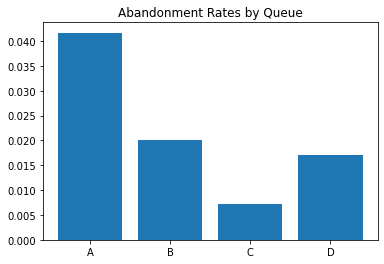

In [67]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.


abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
    

names = list(abandonment_rates.keys())
values = list(abandonment_rates.values())
plt.bar(range(len(abandonment_rates)), values,tick_label=names)
plt.title("Abandonment Rates by Queue")
plt.show()
    
    

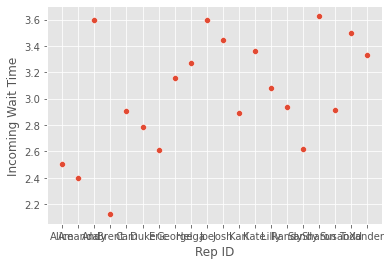

In [63]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep

quick_calls = df[10 + df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()
total_stats = rep_calls.groupby(['Rep ID']).sum() # Final Table

sb.scatterplot(data=north_plt, x="Rep ID", y="Incoming Wait Time")

# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = df[df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum()# Final Table  










In [51]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need
purpose_group = df.groupby("Call Purpose")
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()


### Visualization Results

For each chart you created, explain why you chose the chart style you chose.
For the first one I did a bar chart since there were only 4 queues seein the data side by side you be easy to interpret.
For the second one I did a scatterplot because it makes it easier to see how long it takes all of the reps to answer calls.

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why? The South branch is working more efficiently because they have the lowest numbers in mentioned KPI's. 
2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help? The north could benefit from the extra help. 
3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis? There is not any information that I wish I had. 

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [ ]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:
